# OpenSAFELY COVID Vaccine coverage report

OpenSAFELY is a new secure analytics platform for electronic patient records built on behalf of NHS England to deliver urgent academic and operational research during the pandemic. 

This is our regular weekly report on COVID-19 vaccination coverage in England using data from 40% of general practices that use TPP electronic health record software. **The data requires careful interpretation and there are a number of caveats. Please read the full detail about our methods and discussion of our earlier results (as of January 13th) in our preprint paper available [here](https://www.medrxiv.org/content/10.1101/2021.01.25.21250356v2).** 

The full analytical methods behind the latest results in this report are available [here](https://github.com/opensafely/nhs-covid-vaccination-uptake).

In [1]:
from datetime import datetime
from IPython.display import display, Markdown
import os
import pandas as pd
pd.set_option("display.max_rows", 200)

suffix = "_tpp"

display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

with open(os.path.join("..", "interim-outputs","text", "latest_date.txt"), 'r') as file:
    latest_date_fmt = file.read()
    display(Markdown(f"### Vaccinations included up to **{latest_date_fmt}** inclusive"))

### Report last updated **22 Feb 2021**

### Vaccinations included up to **22 Feb 2021** inclusive

#### 
#### Contents:
- <a href=#summary>Overview</a>
- <a href=#summarychart>Summary Chart</a>
- Trends in vaccination coverage according to demographic/clinical features, for:
 - <a href=#charts80>80+ population</a>
 - <a href=#charts70>70-79 population</a>
- <a href=#tables>Current vaccination coverage of each eligible population group, according to demographic/clinical features</a>

# 
## Overview of Vaccination Figures to date <a name='summary' />

In [2]:
import json
summary_stats = json.load(open(os.path.join("..", "interim-outputs","text", "summary_stats.txt")))

for x in summary_stats.keys():
    display(Markdown(f"{x}: {summary_stats[x]}"))
    
display(Markdown(f"#### Notes \n Patient counts are rounded to nearest 7\n"\
                 
                "\nPatients are counted in their highest risk category only; e.g. a 65-year-old who is shielding \
                is only counted in the shielding group, not in the 65-69 population"))

### As at 22 Feb 2021: 

**Total** population vaccinated in TPP: 19,999

**80+** population vaccinated: 2,744 (40.4% of 6,790)

**70-79** population vaccinated: 2,933 (40.1% of 7,322)

**care home** population vaccinated: 476 (41.9% of 1,141)

**shielding (aged 16-69)** population vaccinated: 161 (39.0% of 420)

**65-69** population vaccinated: 1,288 (41.3% of 3,122)

**under 65s, not in other eligible groups shown** population vaccinated: 12,390

#### Vaccine types and second doses: 

Second doses (% of all vaccinated): 4,998 (25.0%)

Oxford-AZ vaccines (% of all first doses): 7 (0.0%)

#### Notes 
 Patient counts are rounded to nearest 7

Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding                 is only counted in the shielding group, not in the 65-69 population

# 

## Summary Chart <a name='summarychart' />

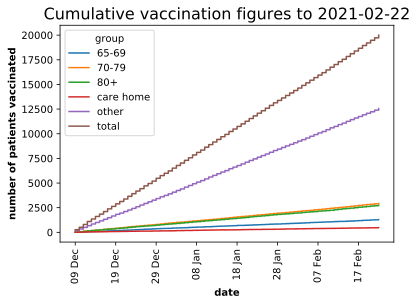

In [3]:
import sys
sys.path.append('../lib/')
from create_report import *

show_chart(filepath="Cumulative vaccination figures.svg", title="off")

## Trends in vaccination rates of 80+ population according to demographic/clinical features, cumulatively by day. <a name='charts80' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**


## 80+ population

### COVID vaccinations among 80+ population
 ### by Sex

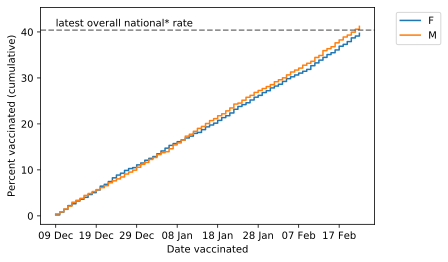

### COVID vaccinations among 80+ population
 ### by Ethnicity (broad categories)

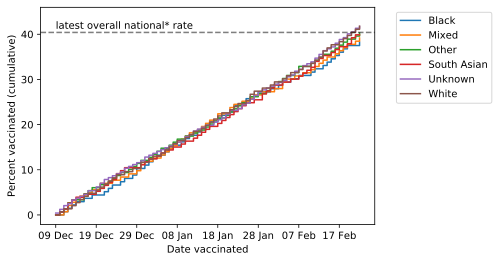

### COVID vaccinations among 80+ population
 ### by Index of Multiple Deprivation (quintiles)

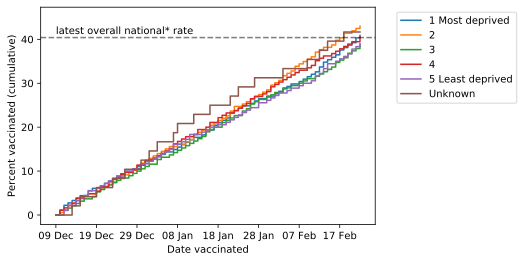

### COVID vaccinations among 80+ population
 ### by BMI

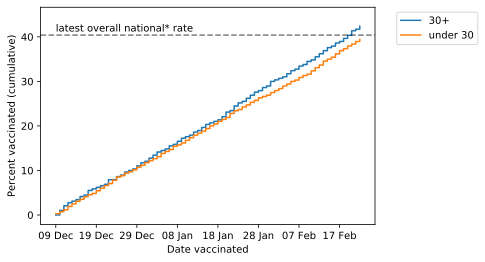

### COVID vaccinations among 80+ population
 ### by Chronic cardiac disease

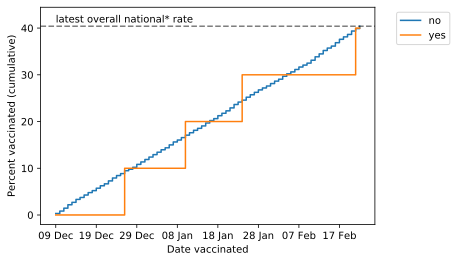

### COVID vaccinations among 80+ population
 ### by Current COPD

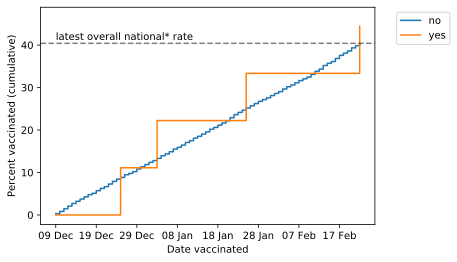

### COVID vaccinations among 80+ population
 ### by Cancer (lung)

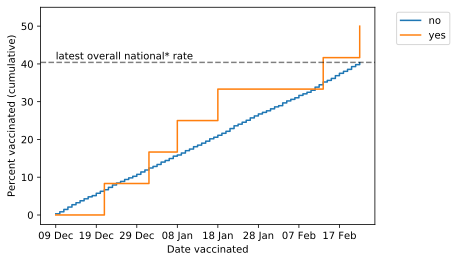

### COVID vaccinations among 80+ population
 ### by Cancer (haematological)

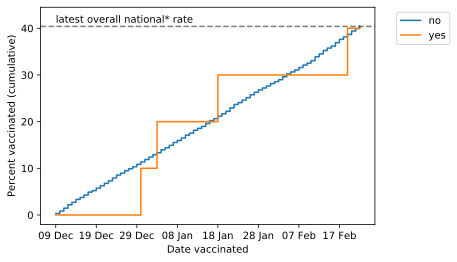

### COVID vaccinations among 80+ population
 ### by Cancer (excluding lung/haem)

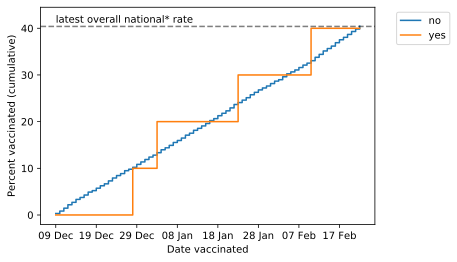

### COVID vaccinations among 80+ population
 ### by Chemo or radiotherapy

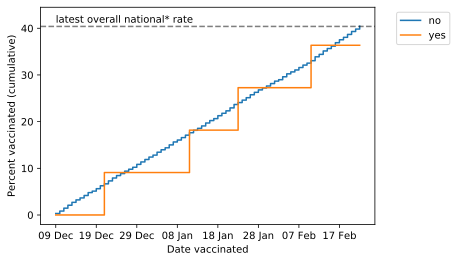

### COVID vaccinations among 80+ population
 ### by Dialysis

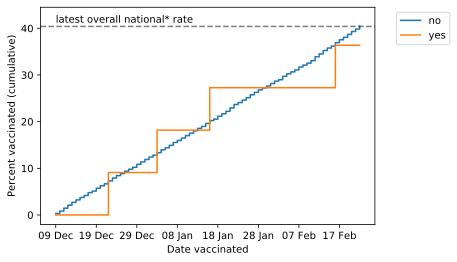

### COVID vaccinations among 80+ population
 ### by DMARDs

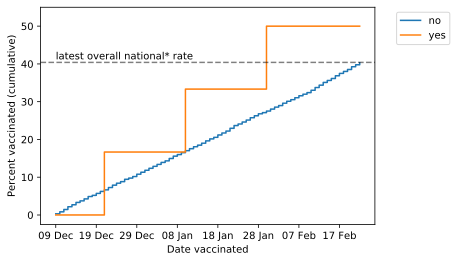

### COVID vaccinations among 80+ population
 ### by Dementia

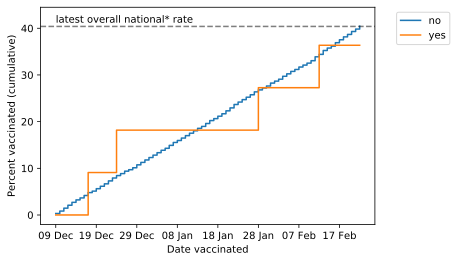

### COVID vaccinations among 80+ population
 ### by Intellectual disability inc Down syndrome

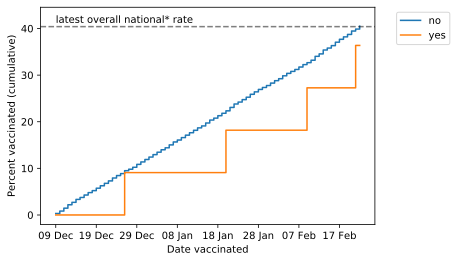

### COVID vaccinations among 80+ population
 ### by Psychosis, schizophrenia, or bipolar

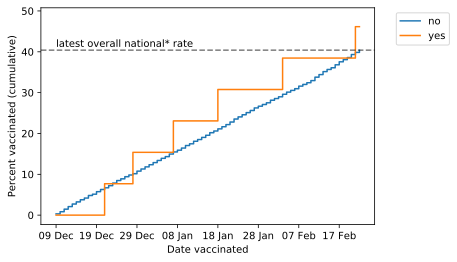

### COVID vaccinations among 80+ population
 ### by SSRI (last 12 months)

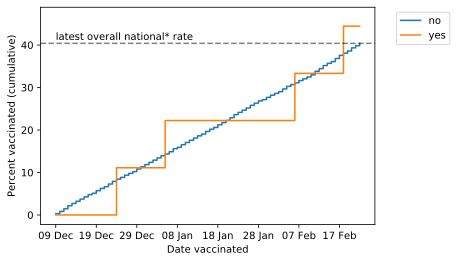

In [4]:
chartlist = find_and_sort_filenames(foldername="figures",
                                        files_to_exclude=["Cumulative vaccination figures.svg"])
   
display(Markdown("## 80+ population"))
for item in chartlist:
    show_chart(item)


## Trends in vaccination rates of 70-79 population according to demographic/clinical features, cumulatively by day. <a name='charts70' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**


## 70-79 population

### COVID vaccinations among 70-79 population
 ### by Sex

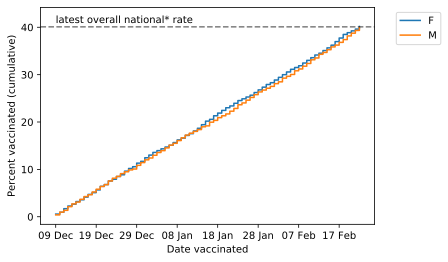

### COVID vaccinations among 70-79 population
 ### by Ethnicity (broad categories)

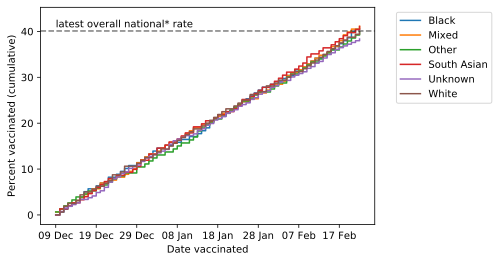

### COVID vaccinations among 70-79 population
 ### by Index of Multiple Deprivation (quintiles)

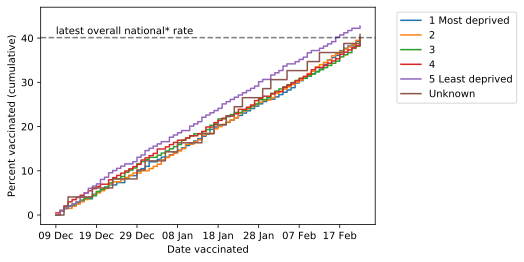

### COVID vaccinations among 70-79 population
 ### by BMI

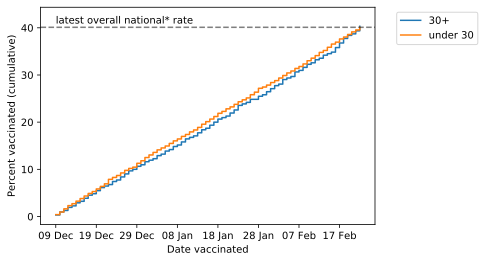

### COVID vaccinations among 70-79 population
 ### by Chronic cardiac disease

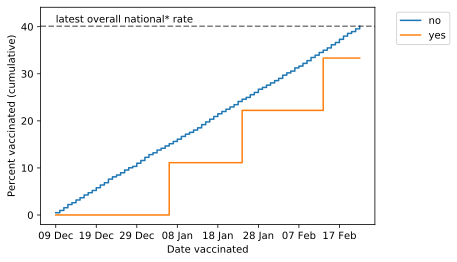

### COVID vaccinations among 70-79 population
 ### by Current COPD

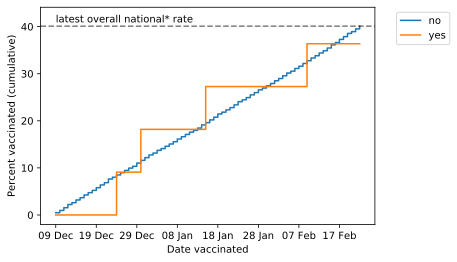

### COVID vaccinations among 70-79 population
 ### by Cancer (lung)

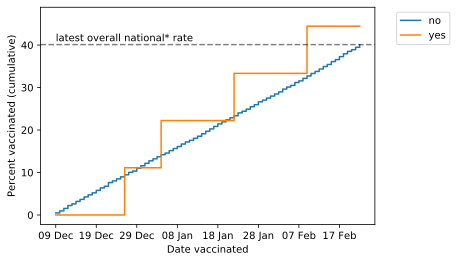

### COVID vaccinations among 70-79 population
 ### by Cancer (haematological)

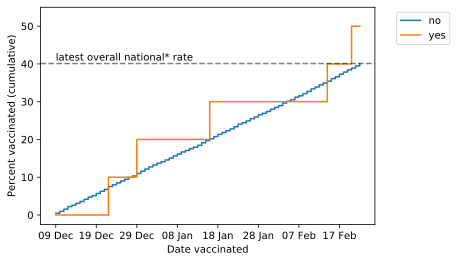

### COVID vaccinations among 70-79 population
 ### by Cancer (excluding lung/haem)

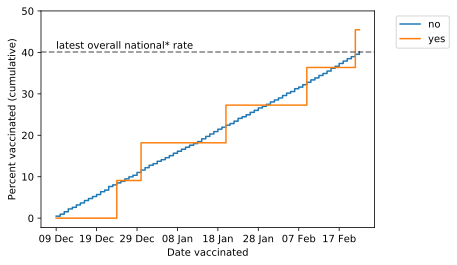

### COVID vaccinations among 70-79 population
 ### by Chemo or radiotherapy

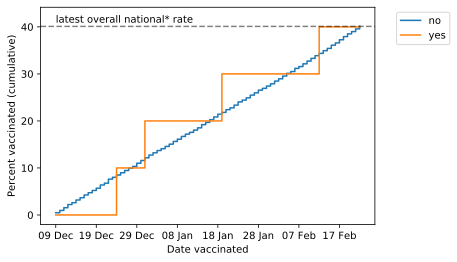

### COVID vaccinations among 70-79 population
 ### by Dialysis

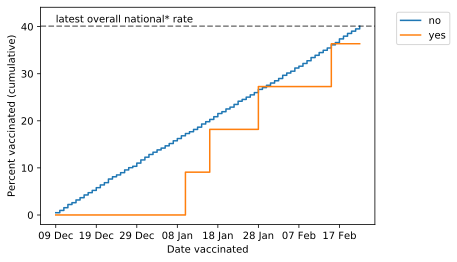

### COVID vaccinations among 70-79 population
 ### by DMARDs

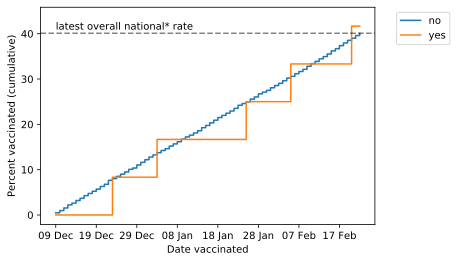

### COVID vaccinations among 70-79 population
 ### by Dementia

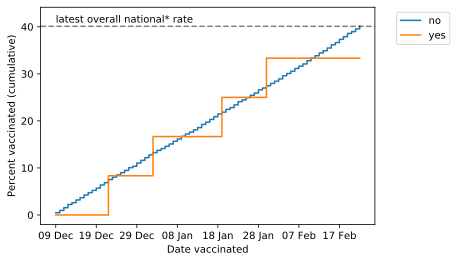

### COVID vaccinations among 70-79 population
 ### by Intellectual disability inc Down syndrome

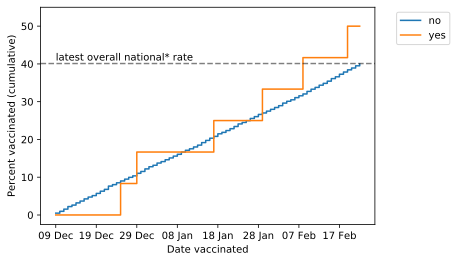

### COVID vaccinations among 70-79 population
 ### by Psychosis, schizophrenia, or bipolar

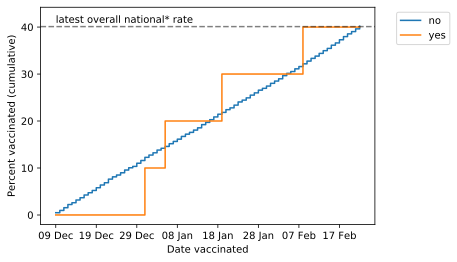

### COVID vaccinations among 70-79 population
 ### by SSRI (last 12 months)

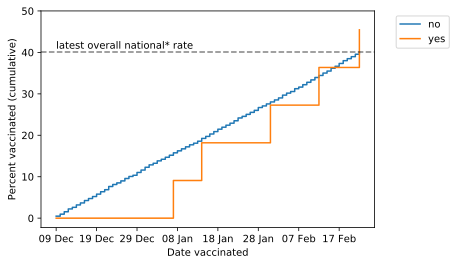

In [5]:
    
display(Markdown("## 70-79 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="70-79",
                                        files_to_exclude=["Cumulative vaccination figures.svg"])
    
for item in chartlist2:
    show_chart(item)    

# 
## Vaccination rates of each eligible population group, according to demographic/clinical features  <a name='tables' />

In [6]:
tablelist = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                            pre_string="among ", tail_string=" population.csv",
                            population_subset="",
                            files_to_exclude=[])
    
for filename in tablelist:
    show_table(filename, latest_date_fmt, show_carehomes=True, suffix=suffix)

## 
 ## Cumulative vaccination figures among 80+ population 
 Please refer to footnotes below table for information.

Vaccinated at 22 Feb (n)  \
Category                                  Group                                                           
overall                                   overall                                                  2742   
Sex                                       F                                                        1379   
                                          M                                                        1365   
Age band                                  0                                                         168   
                                          0-15                                                      147   
                                          16-29                                                     175   
                                          30-34                                                     147   
                                          35-39                                                     175   
                                          40-44                                                     161   
                                          45-49                                                     161   
                                          50-54                                                     175   
                                          55-59                                                     168   
                                          60-64                                                     182   
                                          65-69                                                     182   
                                          70-74                                                     189   
                                          75-79                                                     182   
                                          80-84                                                     189   
                                          85-89                                                     161   
                                          90+                                                       182   
Ethnicity (broad categories)              Black                                                     364   
                                          Mixed                                                     392   
                                          Other                                                     420   
                                          South Asian                                               427   
                                          Unknown                                                   707   
                                          White                                                     427   
ethnicity 16 groups                        African                                                  126   
                                           Bangladeshi or British Bangladeshi                       126   
                                           Caribbean                                                126   
                                           Chinese                                                  126   
                                           Other                                                    119   
                                           Other Asian                                              119   
                                          British or Mixed British                                  140   
                                          Indian or British Indian                                  147   
                                          Irish                                                     140   
                                          Other Black                                               126   
                                          Other White                                               126   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, Intellectual disability incl Down syndrome, or Dementia.

## 
 ## Cumulative vaccination figures among 70-79 population 
 Please refer to footnotes below table for information.

Vaccinated at 22 Feb (n)  \
Category                                  Group                                                           
overall                                   overall                                                  2935   
Sex                                       F                                                        1491   
                                          M                                                        1442   
Age band                                  0                                                         182   
                                          0-15                                                      203   
                                          16-29                                                     175   
                                          30-34                                                     189   
                                          35-39                                                     196   
                                          40-44                                                     168   
                                          45-49                                                     189   
                                          50-54                                                     189   
                                          55-59                                                     161   
                                          60-64                                                     161   
                                          65-69                                                     175   
                                          70-74                                                     203   
                                          75-79                                                     182   
                                          80-84                                                     196   
                                          85-89                                                     168   
                                          90+                                                       182   
Ethnicity (broad categories)              Black                                                     448   
                                          Mixed                                                     455   
                                          Other                                                     427   
                                          South Asian                                               434   
                                          Unknown                                                   714   
                                          White                                                     448   
ethnicity 16 groups                        African                                                  154   
                                           Bangladeshi or British Bangladeshi                       140   
                                           Caribbean                                                140   
                                           Chinese                                                  119   
                                           Other                                                    126   
                                           Other Asian                                              133   
                                          British or Mixed British                                  133   
                                          Indian or British Indian                                  140   
                                          Irish                                                     140   
                                          Other Black                                               147   
                                          Other White                                               154   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, Intellectual disability incl Down syndrome, or Dementia.

## 
 ## Cumulative vaccination figures among care home population 
 Please refer to footnotes below table for information.

Vaccinated at 22 Feb (n)  \
Category                     Group                                   
overall                      overall                           478   
Sex                          F                                 245   
                             M                                 231   
Age band                     0                                  35   
                             0-15                               35   
                             16-29                              28   
                             30-34                              35   
                             35-39                              21   
                             40-44                              21   
                             45-49                              28   
                             50-54                              35   
                             55-59                              35   
                             60-64                              21   
                             65-69                              35   
                             70-74                              42   
                             75-79                              28   
                             80-84                              21   
                             85-89                              28   
                             90+                                28   
Ethnicity (broad categories) Black                              70   
                             Mixed                              84   
                             Other                              70   
                             South Asian                        70   
                             Unknown                           119   
                             White                              63   
Dementia                     no                                476   
                             yes                                 0   

                                          Vaccinated at 22 Feb (%)  \
Category                     Group                                   
overall                      overall                          41.9   
Sex                          F                                41.2   
                             M                                42.3   
Age band                     0                                41.7   
                             0-15                             45.5   
                             16-29                            40.0   
                             30-34                            50.0   
                             35-39                            33.3   
                             40-44                            30.0   
                             45-49                            40.0   
                             50-54                            50.0   
                             55-59                            50.0   
                             60-64                            37.5   
                             65-69                            41.7   
                             70-74                            50.0   
                             75-79                            40.0   
                             80-84                            33.3   
                             85-89                            40.0   
                             90+                              40.0   
Ethnicity (broad categories) Black                            41.7   
                             Mixed                            44.4   
                             Other                            43.5   
                             South Asian                      43.5   
                             Unknown                          39.5   
                             White                            39.1   
Dementia                     no                               42.0   
                             yes                   

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population includes those known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among shielding (aged 16-69) population 
 Please refer to footnotes below table for information.

Vaccinated at 22 Feb (n)  \
Category                                  Group                                        
overall                                   overall                                164   
newly shielded since feb 15               no                                     161   
                                          yes                                      0   
Sex                                       F                                       91   
                                          M                                       70   
Age band                                  16-29                                   21   
                                          30-39                                   21   
                                          40-49                                   21   
                                          50-59                                   14   
                                          60-69                                   21   
                                          70-79                                   42   
                                          80+                                     21   
Ethnicity (broad categories)              Black                                   28   
                                          Mixed                                   14   
                                          Other                                   21   
                                          South Asian                             21   
                                          Unknown                                 49   
                                          White                                   28   
Index of Multiple Deprivation (quintiles) 1 Most deprived                         28   
                                          2                                       28   
                                          3                                       35   
                                          4                                       35   
                                          5 Least deprived                        35   
                                          Unknown                                 14   

                                                            Vaccinated at 22 Feb (%)  \
Category                                  Group                                        
overall                                   overall                               39.0   
newly shielded since feb 15               no                                    38.3   
                                          yes                                    NaN   
Sex                                       F                                     43.3   
                                          M                                     33.3   
Age band                                  16-29                                 33.3   
                                          30-39                                 42.9   
                                          40-49                                 37.5   
                                          50-59                                 28.6   
                                          60-69                                 37.5   
                                          70-79                                 40.0   
                                          80+                                   42.9   
Ethnicity (broad categories)              Black                                 36.4   
                                          Mixed                                 25.0   
                                          Other                                 33.3   
                                          South Asian                           37.5   
                                          Unknown                               43.8   
                                          White                                 50.0   
Index of Mu

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those over 65 known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among 65-69 population 
 Please refer to footnotes below table for information.

Vaccinated at 22 Feb (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1288   
Sex                                       F                                                         644   
                                          M                                                         644   
Ethnicity (broad categories)              Black                                                     182   
                                          Mixed                                                     189   
                                          Other                                                     189   
                                          South Asian                                               196   
                                          Unknown                                                   315   
                                          White                                                     217   
ethnicity 16 groups                        African                                                   63   
                                           Bangladeshi or British Bangladeshi                        63   
                                           Caribbean                                                 63   
                                           Chinese                                                   63   
                                           Other                                                     63   
                                           Other Asian                                               56   
                                          British or Mixed British                                   63   
                                          Indian or British Indian                                   56   
                                          Irish                                                      63   
                                          Other Black                                                56   
                                          Other White                                                70   
                                          Other mixed                                                63   
                                          Pakistani or British Pakistani                             56   
                                          Unknown                                                   315   
                                          White + Asian                                              56   
                                          White + Black African                                      56   
                                          White + Black Caribbean                                    63   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           280   
                                          2                                                         217   
                                          3                                                         245   
                                          4                                                         231   
                                          5 Least deprived                                          259   
                                          Unknown                                                    56   
BMI                                       30+                                                       378   
                                          under 30                                                  910   
Chronic cardiac disease                   no                                                       1274   
                                          yes                                                        14   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- Population excludes those who are currently shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, Intellectual disability incl Down syndrome, or Dementia.

## 
 ## Cumulative vaccination figures among under 65s, not in other eligible groups shown population 
 Please refer to footnotes below table for information.

Vaccinated at 22 Feb (n)  \
Category                                  Group                                                           
overall                                   overall                                                 12393   
Sex                                       F                                                        6265   
                                          M                                                        6125   
Age band                                  16-29                                                    1645   
                                          30-39                                                    1673   
                                          40-49                                                    1645   
                                          50-59                                                    1631   
                                          60-69                                                    1631   
                                          70-79                                                    2807   
                                          80+                                                      1365   
Ethnicity (broad categories)              Black                                                    1841   
                                          Mixed                                                    1862   
                                          Other                                                    1897   
                                          South Asian                                              1869   
                                          Unknown                                                  3031   
                                          White                                                    1897   
ethnicity 16 groups                        African                                                  595   
                                           Bangladeshi or British Bangladeshi                       616   
                                           Caribbean                                                574   
                                           Chinese                                                  553   
                                           Other                                                    609   
                                           Other Asian                                              595   
                                          British or Mixed British                                  602   
                                          Indian or British Indian                                  525   
                                          Irish                                                     574   
                                          Other Black                                               574   
                                          Other White                                               581   
                                          Other mixed                                               595   
                                          Pakistani or British Pakistani                            602   
                                          Unknown                                                  3136   
                                          White + Asian                                             525   
                                          White + Black African                                     567   
                                          White + Black Caribbean                                   553   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                          2422   
                                          2                                                        2394   
                                          3                                                        2415   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, Intellectual disability incl Down syndrome, or Dementia.